In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge the datasets
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')

In [3]:
# Select features for clustering
features = ['Region', 'TotalValue', 'Quantity']
df_clustering = merged_df[features].copy()

# Encode categorical variables
le = LabelEncoder()
df_clustering['Region'] = le.fit_transform(df_clustering['Region'])

# Scale numerical data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

In [4]:
# Perform clustering for different numbers of clusters
dbi_scores = []
silhouette_scores = []
clusters_range = range(2, 11)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    # Calculate metrics
    dbi = davies_bouldin_score(scaled_features, labels)
    silhouette = silhouette_score(scaled_features, labels)

    dbi_scores.append(dbi)
    silhouette_scores.append(silhouette)

In [5]:
# Find the optimal number of clusters based on DBI (lower is better)
optimal_clusters = clusters_range[np.argmin(dbi_scores)]

print(f'Optimal number of clusters: {optimal_clusters}')
print(f'Minimum DB Index: {min(dbi_scores):.2f}')

Optimal number of clusters: 7
Minimum DB Index: 0.99


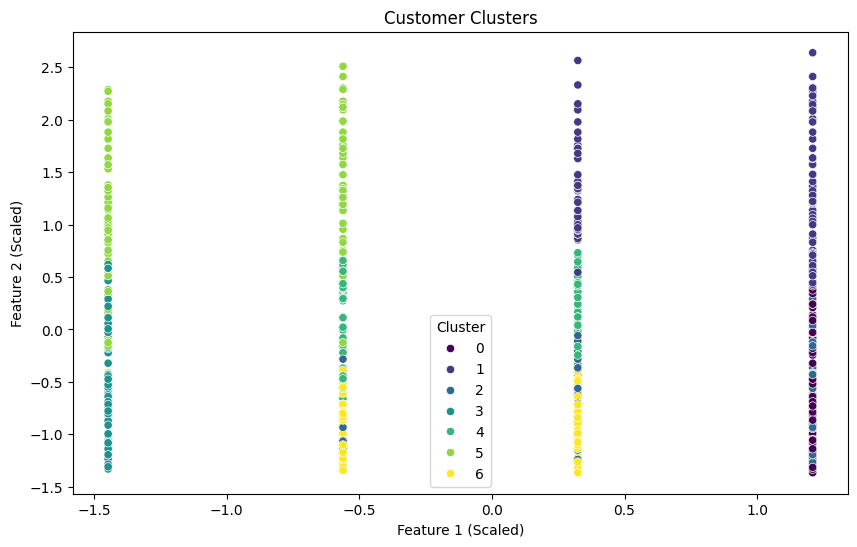

In [6]:
# Refit the model with optimal clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_df['Cluster'] = kmeans_optimal.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=merged_df['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.show()

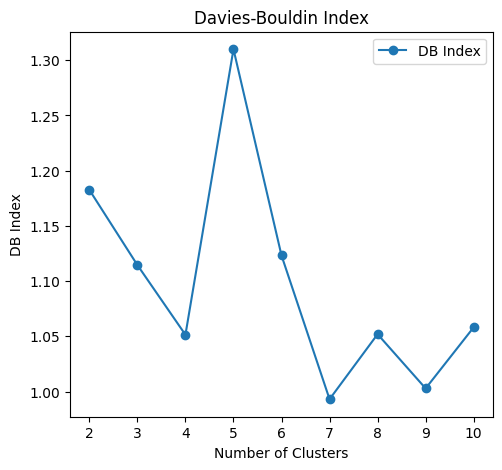

In [10]:
# Save clustering results
merged_df.to_csv('ClusteringResults.csv', index=False)

# Plot DBI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(clusters_range, dbi_scores, marker='o', label='DB Index')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.legend()

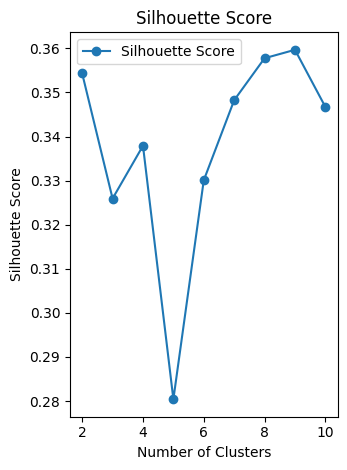

In [9]:
#Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(clusters_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
print(f'Silhouette Scores: {silhouette_scores}')

Silhouette Scores: [0.3543111003386848, 0.32594241581112826, 0.33791475823962924, 0.2804064839529183, 0.33008730899595523, 0.3482487257641776, 0.35777354373813436, 0.35968510439856743, 0.3467325604090716]


In [14]:
# Calculating DBI values for all the clusters
for i, dbi in enumerate(dbi_scores):
    print(f"DBI for {i+2} clusters: {dbi:.2f}")

DBI for 2 clusters: 1.18
DBI for 3 clusters: 1.11
DBI for 4 clusters: 1.05
DBI for 5 clusters: 1.31
DBI for 6 clusters: 1.12
DBI for 7 clusters: 0.99
DBI for 8 clusters: 1.05
DBI for 9 clusters: 1.00
DBI for 10 clusters: 1.06
